In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data' )
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.drop(['ID#','Award?'],axis = 1,inplace = True)

In [4]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [6]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

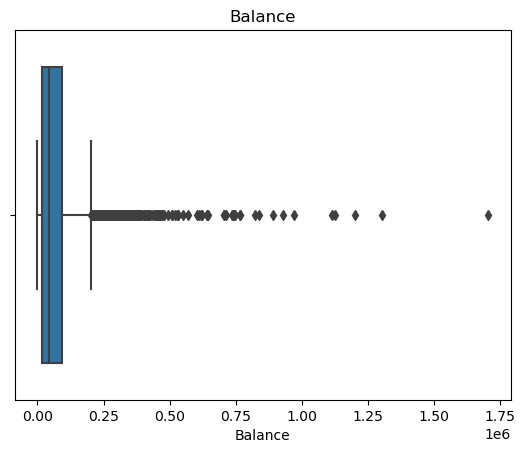

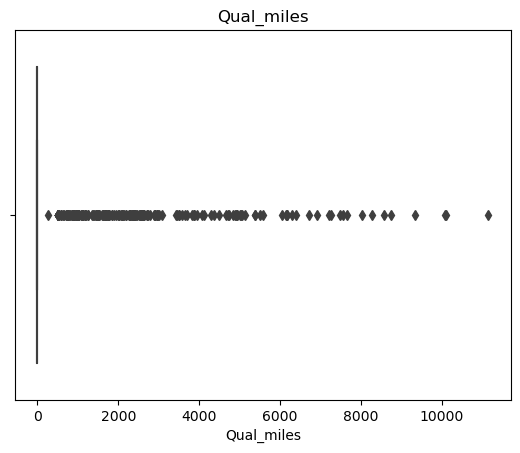

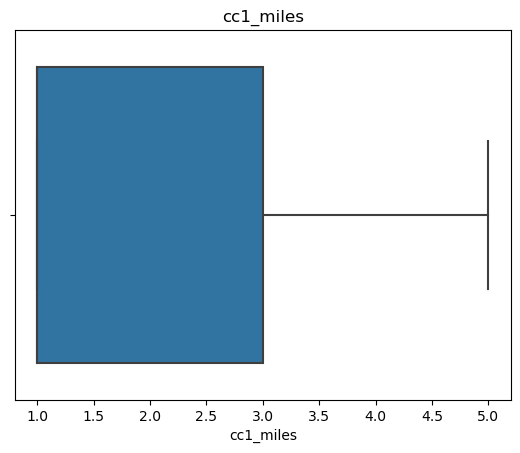

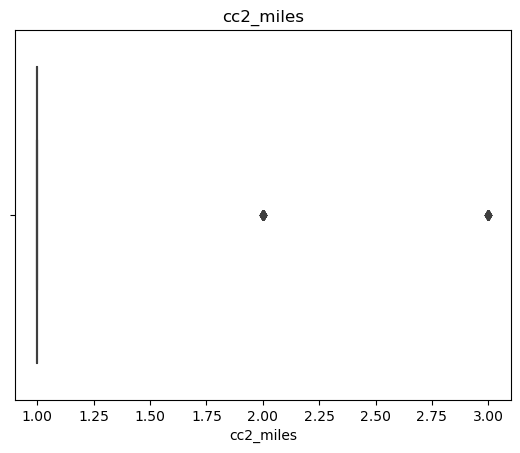

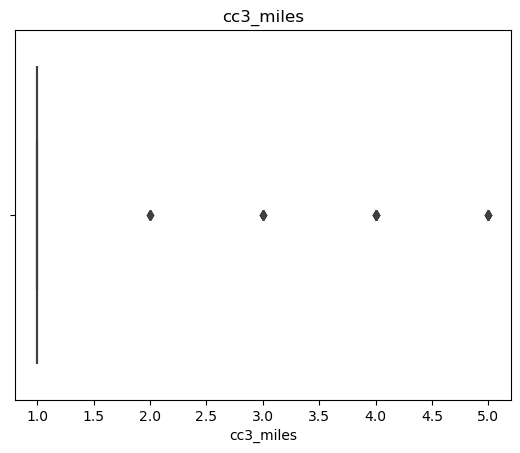

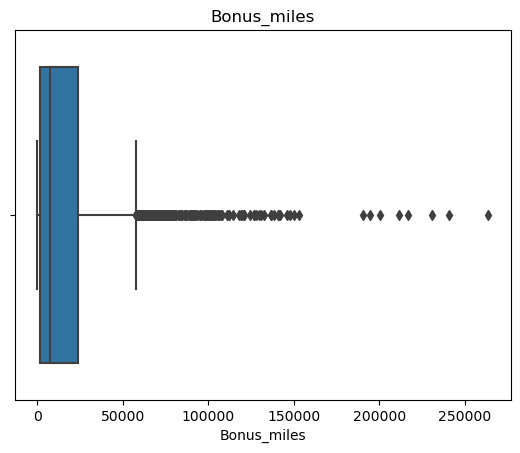

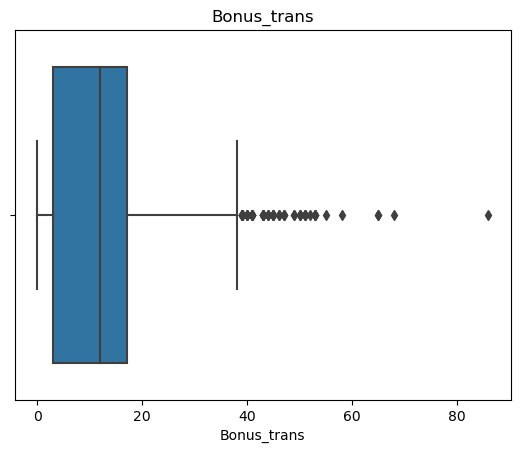

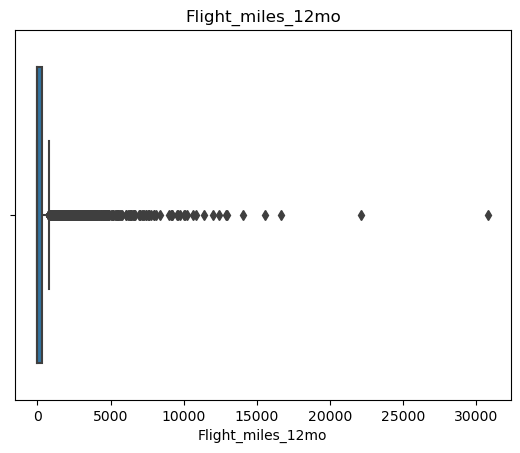

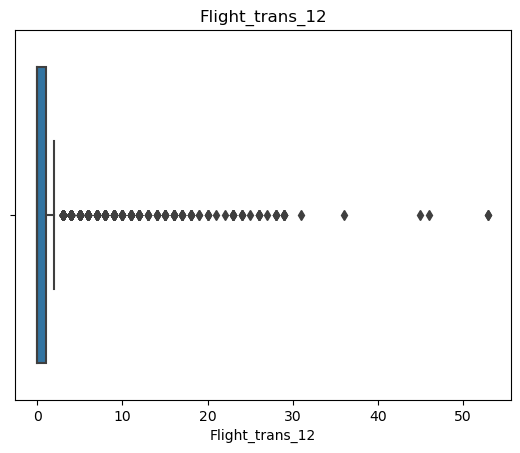

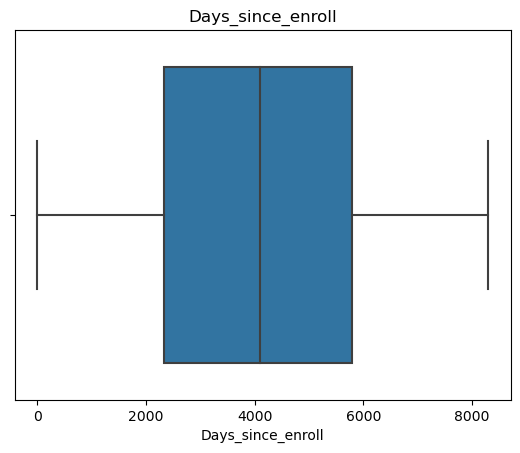

In [7]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
sc_data=sc.fit_transform(df)
sc_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [11]:
sc=pd.DataFrame(sc_data,columns = df.columns)
sc

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [12]:
sc.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll'],
      dtype='object')

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

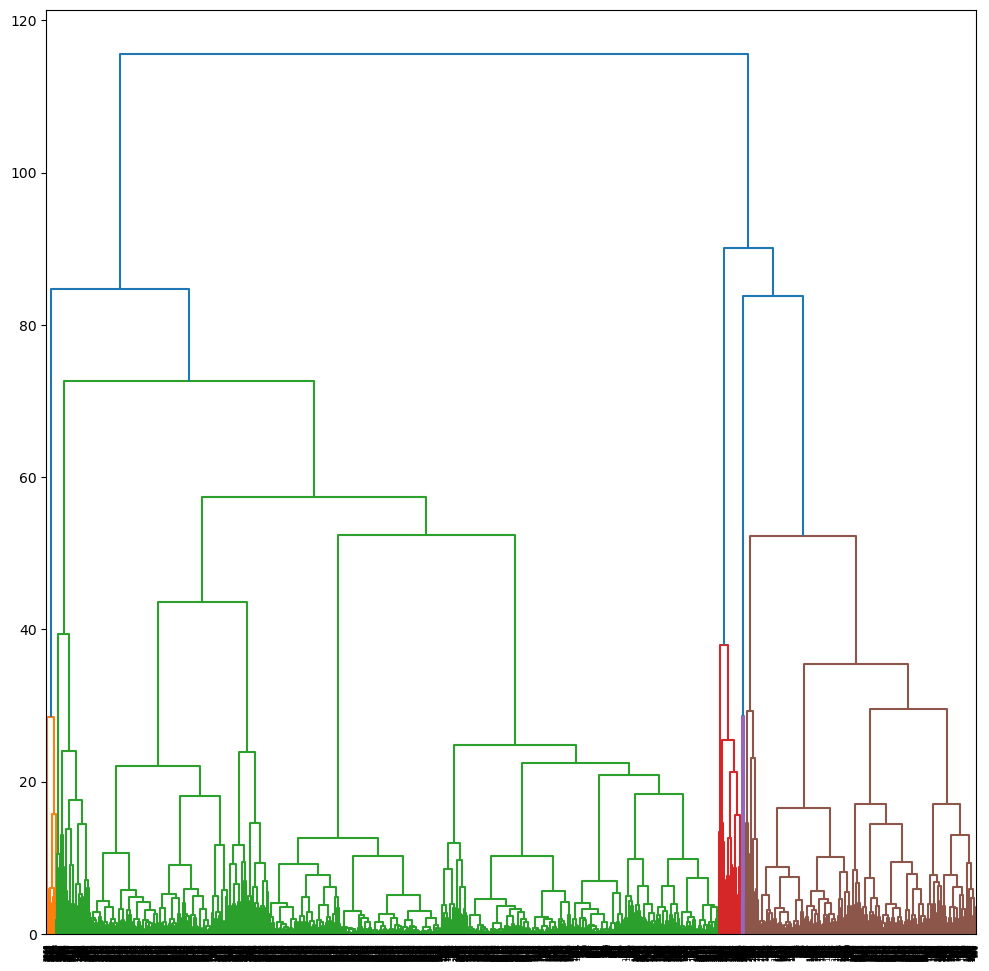

In [14]:
plt.figure(figsize = (12,12))
wardlink = linkage(sc,method = 'ward', metric='euclidean')
warddend = dendrogram(wardlink)

In [15]:
from scipy.cluster.hierarchy import fcluster

In [16]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [17]:
df['clusters'] = clusters

In [18]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,3


In [19]:
cluster_df = df.groupby('clusters').mean().reset_index()
cluster_df

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,50730.653992,174.875907,1.393363,1.020048,1.000000,6983.188731,8.488075,327.127549,0.998617,3678.250951
1,2,148606.020833,393.125000,2.666667,1.000000,1.000000,42401.354167,32.541667,6683.468750,18.572917,5040.406250
2,3,131981.929703,32.334653,3.909901,1.000000,1.048515,43850.836634,18.530693,249.277228,0.812871,5292.138614


In [20]:
cluster_freq = df['clusters'].value_counts().sort_index()
cluster_freq

1    2893
2      96
3    1010
Name: clusters, dtype: int64

In [21]:
cluster_df['cluster_freq'] = cluster_freq.values

In [22]:
cluster_df

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster_freq
0,1,50730.653992,174.875907,1.393363,1.020048,1.000000,6983.188731,8.488075,327.127549,0.998617,3678.250951,2893
1,2,148606.020833,393.125000,2.666667,1.000000,1.000000,42401.354167,32.541667,6683.468750,18.572917,5040.406250,96
2,3,131981.929703,32.334653,3.909901,1.000000,1.048515,43850.836634,18.530693,249.277228,0.812871,5292.138614,1010


In [23]:
k_means = KMeans(n_clusters = 2)

In [24]:
k_means = KMeans(n_clusters = 3)
k_means.fit(sc)
k_means.inertia_

27558.765175681914

In [25]:
k_means = KMeans(n_clusters = 4)
k_means.fit(sc)
k_means.inertia_

23808.154939367592

In [26]:
k_means = KMeans(n_clusters = 5)
k_means.fit(sc)
k_means.inertia_

21181.08099628048

In [27]:
k_means = KMeans(n_clusters = 6)
k_means.fit(sc)
k_means.inertia_

17725.10309156921

In [28]:
k_means = KMeans(n_clusters = 7)
k_means.fit(sc)
k_means.inertia_

15873.131022503234

In [29]:
k_means = KMeans(n_clusters = 8)
k_means.fit(sc)
k_means.inertia_

14349.18292452605

In [30]:
k_means = KMeans(n_clusters = 9)
k_means.fit(sc)
k_means.inertia_

13245.93910279462

In [31]:
k_means = KMeans(n_clusters = 10)
k_means.fit(sc)
k_means.inertia_

12145.070997897868

In [32]:
wss =[]

In [33]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(sc)
    wss.append(KM.inertia_)

In [34]:
wss

[39990.00000000001,
 32088.279699590767,
 27558.68727688436,
 23808.08597846731,
 20349.101443769956,
 17724.645123551614,
 15871.16210230123,
 14353.93700144753,
 13252.01602814834,
 12146.218561156655]

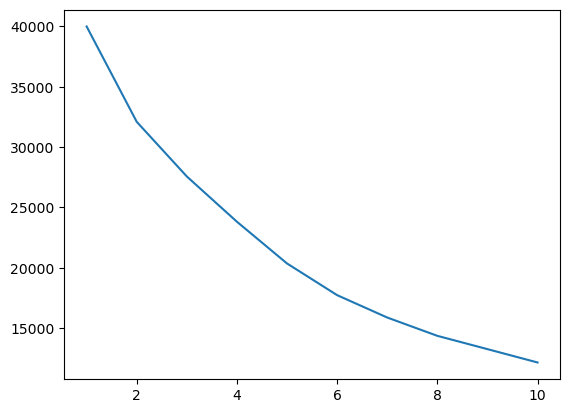

In [35]:
plt.plot(range(1,11), wss)

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


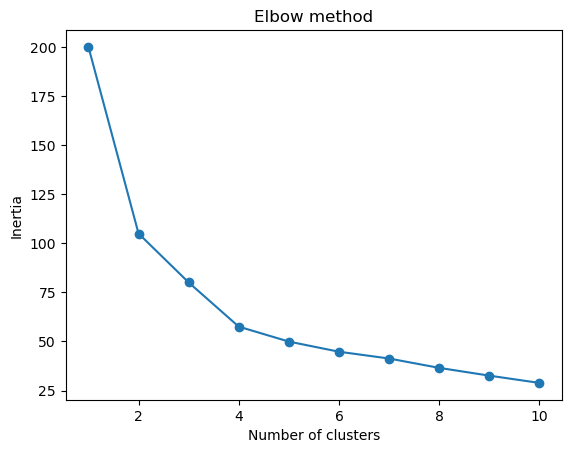

In [63]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    y = kmeans.fit_predict(sc)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
sc['clusters']= y
df.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters,Clus_kmeans,sil_width
0,28143,0,1,1,1,174,1,0,0,7000,1,0,0.444051
1,19244,0,1,1,1,215,2,0,0,6968,1,0,0.446026
2,41354,0,1,1,1,4123,4,0,0,7034,1,0,0.423325
3,14776,0,1,1,1,500,1,0,0,6952,1,0,0.447755
4,97752,0,4,1,1,43300,26,2077,4,6935,3,2,0.328050
5,16420,0,1,1,1,0,0,0,0,6942,1,0,0.448807
6,84914,0,3,1,1,27482,25,0,0,6994,3,2,0.268206
7,20856,0,1,1,1,5250,4,250,1,6938,1,0,0.429741
8,443003,0,3,2,1,1753,43,3850,12,6948,1,3,0.184354
9,104860,0,3,1,1,28426,28,1150,3,6931,3,2,0.270102


In [36]:
k_means = KMeans(n_clusters = 5)
k_means.fit(sc)
labels = k_means.labels_

In [37]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
df["Clus_kmeans"] = labels
df.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters,Clus_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,1,0
1,19244,0,1,1,1,215,2,0,0,6968,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,1,0
3,14776,0,1,1,1,500,1,0,0,6952,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,3,2


In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
silhouette_score(sc,labels)

0.3486271449464277

In [41]:
sil_width = silhouette_samples(sc,labels)
df["sil_width"] = sil_width
df.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters,Clus_kmeans,sil_width
0,28143,0,1,1,1,174,1,0,0,7000,1,0,0.444051
1,19244,0,1,1,1,215,2,0,0,6968,1,0,0.446026
2,41354,0,1,1,1,4123,4,0,0,7034,1,0,0.423325
3,14776,0,1,1,1,500,1,0,0,6952,1,0,0.447755
4,97752,0,4,1,1,43300,26,2077,4,6935,3,2,0.328050


In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan.fit(sc)
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [43]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,-1
3997,0


In [44]:
clustered = pd.concat([df,cl],axis=1)

In [45]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters,Clus_kmeans,sil_width,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1,0,0.444051,0
1,19244,0,1,1,1,215,2,0,0,6968,1,0,0.446026,0
2,41354,0,1,1,1,4123,4,0,0,7034,1,0,0.423325,0
3,14776,0,1,1,1,500,1,0,0,6952,1,0,0.447755,0
4,97752,0,4,1,1,43300,26,2077,4,6935,3,2,0.328050,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0.539140,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0.537985,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0.142036,-1
3997,54899,0,1,1,1,500,1,500,1,1401,1,0,0.540980,0


In [46]:
clustered['cluster'].value_counts()

-1    1716
 0    1635
 1     384
 3     135
 2     129
Name: cluster, dtype: int64

# Crime Data 

In [66]:
df1 = pd.read_csv('crime_data.csv')
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [67]:
df1.drop('Unnamed: 0',axis = 1,inplace = True)

In [68]:
sc = StandardScaler()
sc_df = sc.fit_transform(df1)

In [69]:
sc_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [70]:
sc=pd.DataFrame(sc_df,columns = df1.columns)
sc

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


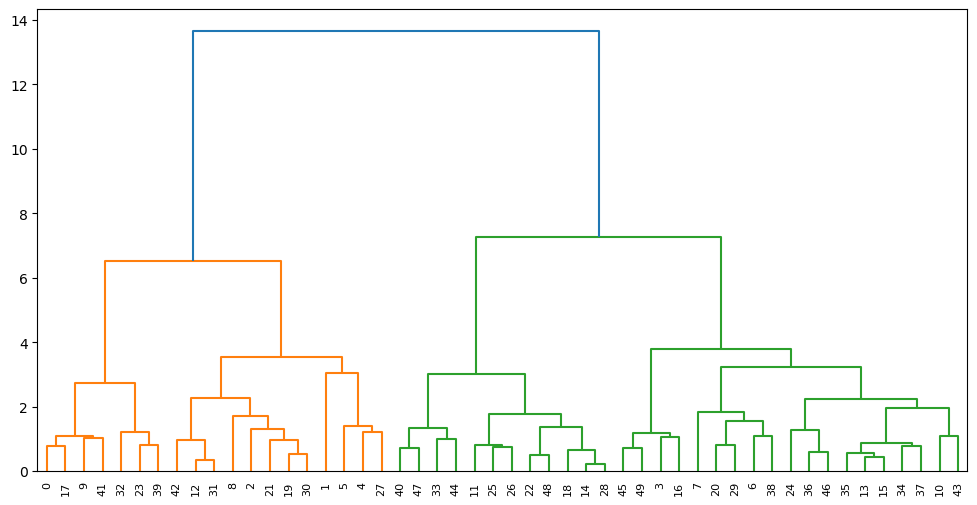

In [71]:
plt.figure(figsize = (12,6))
wardlink = linkage(sc,method = 'ward', metric='euclidean')
warddend = dendrogram(wardlink)

In [72]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1,
       2, 1, 3, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [73]:
df1[' hierachy cluster'] = clusters

In [74]:
df1.head()

,Murder,Assault,UrbanPop,Rape,hierachy cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1


In [75]:
df1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', ' hierachy cluster'], dtype='object')

In [76]:
cluster_freq = df1[' hierachy cluster'].value_counts()

In [77]:
cluster_freq

1    19
3    19
2    12
Name:  hierachy cluster, dtype: int64

In [78]:
cluster_freq.values

array([19, 19, 12], dtype=int64)

 K Means Clustering

In [79]:
k_means = KMeans(n_clusters = 5)
k_means.fit(sc)
k_means.inertia_

49.96920284452794

In [80]:
wss =[]

In [81]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(sc)
    wss.append(KM.inertia_)

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\ygred\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


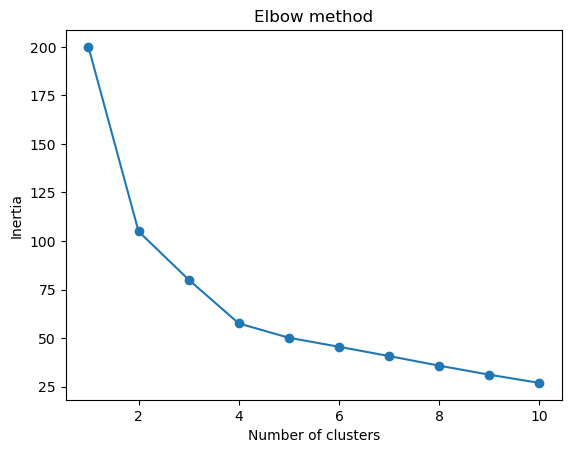

In [82]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    y = kmeans.fit_predict(sc)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
wss

[199.99999999999997,
 104.96163315756871,
 79.92170303159772,
 57.55425863091105,
 50.32802224604083,
 45.519578415209274,
 40.20152405058711,
 35.34516679080475,
 33.91698451390844,
 29.420101796353553]

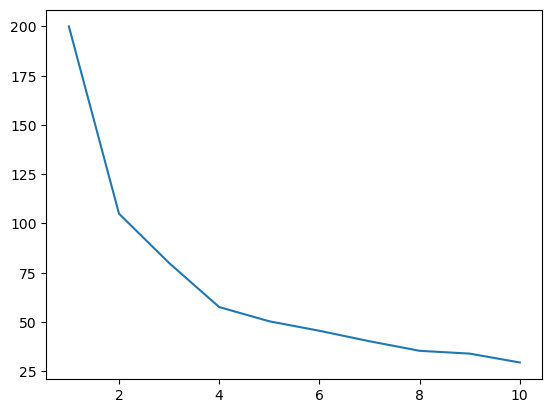

In [84]:
plt.plot(range(1,11), wss)

In [85]:
k_means = KMeans(n_clusters = 4)
k_means.fit(sc)
labels = k_means.labels_

In [66]:
labels

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2])

In [86]:
df1["Clus_kmeans"] = labels
df1.head(5)

,Murder,Assault,UrbanPop,Rape,hierachy cluster,Clus_kmeans
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,1,3
2,8.1,294,80,31.0,1,3
3,8.8,190,50,19.5,3,1
4,9.0,276,91,40.6,1,3


In [87]:
silhouette_score(sc,labels)

0.3396889143334439

In [88]:
sil_width = silhouette_samples(sc,labels)
df1["sil_width"] = sil_width
df1.head(5)

,Murder,Assault,UrbanPop,Rape,hierachy cluster,Clus_kmeans,sil_width
0,13.2,236,58,21.2,1,1,0.485775
1,10.0,263,48,44.5,1,3,0.058252
2,8.1,294,80,31.0,1,3,0.415483
3,8.8,190,50,19.5,3,1,0.118709
4,9.0,276,91,40.6,1,3,0.435559


In [89]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(sc)
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [90]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.head()

,cluster
0,0
1,-1
2,-1
3,-1
4,-1


In [91]:
clustered = pd.concat([df1,cl],axis=1)

In [92]:
clustered

,Murder,Assault,UrbanPop,Rape,hierachy cluster,Clus_kmeans,sil_width,cluster
0,13.2,236,58,21.2,1,1,0.485775,0
1,10.0,263,48,44.5,1,3,0.058252,-1
2,8.1,294,80,31.0,1,3,0.415483,-1
3,8.8,190,50,19.5,3,1,0.118709,-1
4,9.0,276,91,40.6,1,3,0.435559,-1
5,7.9,204,78,38.7,1,3,0.326542,-1
6,3.3,110,77,11.1,3,0,0.227173,1
7,5.9,238,72,15.8,3,0,0.332977,-1
8,15.4,335,80,31.9,1,3,0.258017,-1
9,17.4,211,60,25.8,1,1,0.371803,-1


In [93]:
clustered['cluster'].value_counts()

 1    28
-1    18
 0     4
Name: cluster, dtype: int64

In [94]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(sc)
clustering_model.labels_

array([3, 0, 0, 4, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 4, 3, 2, 0, 1, 0,
       2, 3, 1, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 4, 1, 2, 2, 4], dtype=int64)

In [97]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(df)
# get cluster labels
clusters.labels_
# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [98]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 3999})